In [ ]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, Flatten, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical

In [ ]:
#Data loading and splitting it into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


Untuk data train memiliki 50000 samples dengan dimensi 32 x 32 pixels dan depth 3, artinya gambar yang dimiliki adalah gambar rgb. Sedangkan untuk feature test ada sebanyak 10000 samples. Datasets terdiri dari 10 kategori dari airplane hingga truck (Multiclass Classification Problem)

In [ ]:
# Data kita normalisasikan dan diubah kedalam bentuk float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
#Label Encoding
#One-hot encoding for the label
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
#Building the model (Deep CNN)

from keras.layers import Dropout

model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# FLATTEN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

In [ ]:
history = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), batch_size=32, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6358 - accuracy: 0.3955 - val_loss: 1.2200 - val_accuracy: 0.5601
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2537 - accuracy: 0.5504 - val_loss: 1.0402 - val_accuracy: 0.6338
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0979 - accuracy: 0.6121 - val_loss: 0.9253 - val_accuracy: 0.6787
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0136 - accuracy: 0.6417 - val_loss: 0.9023 - val_accuracy: 0.6865
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9585 - accuracy: 0.6645 - val_loss: 0.8256 - val_accuracy: 0.7077
Epoch 6/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9165 - accuracy: 0.6774 - val_loss: 0.7900 - val_accuracy: 0.7274
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8903 - accuracy: 0.6884 - val_loss: 0.7871 - val_ac

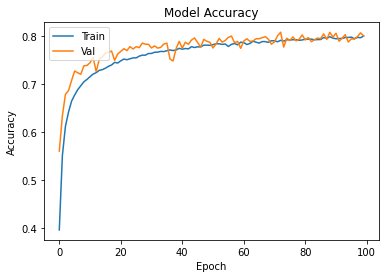

In [ ]:
#Visualize the models accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

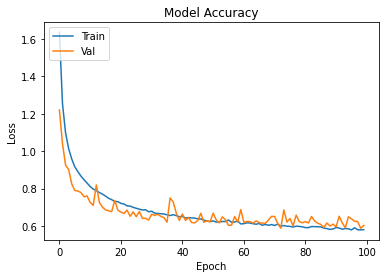

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd

history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,accuracy,val_loss,val_accuracy,epoch
98,0.579095,0.79696,0.587749,0.8071,98
72,0.598718,0.79150,0.588079,0.8084,72
93,0.586631,0.79738,0.590561,0.8033,93
86,0.588999,0.79734,0.592304,0.8050,86
90,0.591890,0.79484,0.595441,0.8063,90
...,...,...,...,...,...
4,0.958488,0.66450,0.825572,0.7077,4
3,1.013570,0.64168,0.902328,0.6865,3
2,1.097872,0.61210,0.925330,0.6787,2
1,1.253692,0.55038,1.040237,0.6338,1


In [ ]:
predictions = model.predict(X_test[:10])
predictions

array([[4.54056542e-04, 6.62310573e-04, 9.64581210e-04, 8.74569952e-01,
        6.06771100e-05, 1.05708174e-01, 1.64482035e-02, 3.73969524e-04,
        4.07899788e-04, 3.50144488e-04],
       [3.35946356e-06, 1.19736833e-04, 1.05897319e-13, 6.78657366e-14,
        1.46560536e-16, 3.24874503e-18, 2.45217692e-12, 8.87982226e-17,
        9.99826491e-01, 5.04149575e-05],
       [1.85696082e-03, 5.06063830e-03, 1.65309143e-06, 1.25678071e-06,
        1.01269620e-07, 6.34068869e-08, 1.30297685e-05, 2.98526821e-08,
        9.89927709e-01, 3.13854264e-03],
       [9.21289265e-01, 1.15775345e-02, 2.96509679e-04, 8.76964987e-05,
        1.07496217e-05, 9.30270630e-07, 1.14543820e-06, 1.09549248e-04,
        6.16422370e-02, 4.98437183e-03],
       [7.79966629e-12, 1.47770560e-10, 8.54654136e-05, 1.08042259e-05,
        5.17335895e-04, 1.78065995e-09, 9.99386430e-01, 9.60226603e-12,
        1.00592173e-10, 3.92106833e-11],
       [1.84366549e-08, 2.34278218e-07, 8.14378669e-04, 1.12971673e-02,
   

In [ ]:
#Print our predicitons as number labels for the first 5 images
print( np.argmax(predictions, axis=1))
#Print the actual labels
print(y_test[:10])

[3 8 8 0 6 6 1 4 3 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


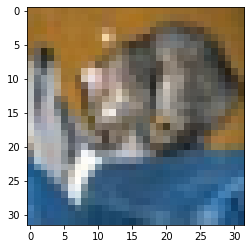

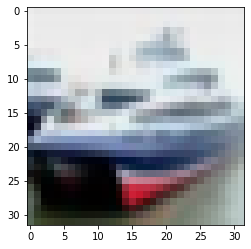

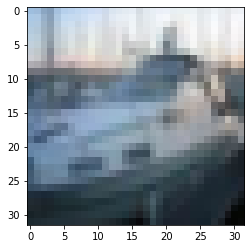

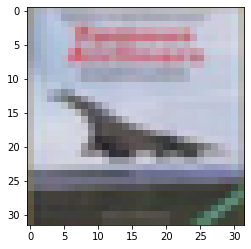

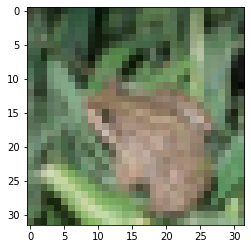

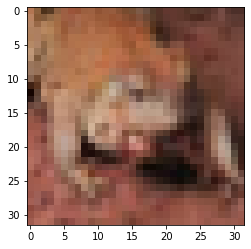

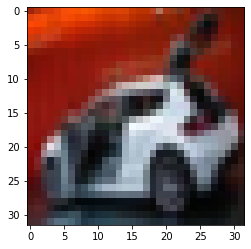

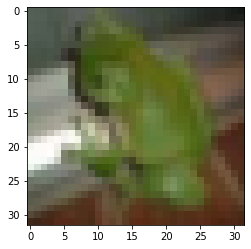

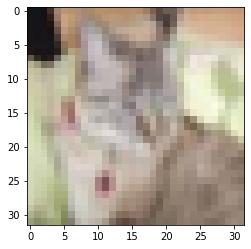

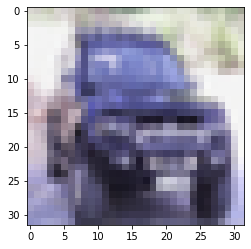

In [ ]:
#Show the first 10 images as pictures 
for i in range(0,10):   
   image = X_test[i]   
   image = np.array(image, dtype='float')   
   pixels = image 
   plt.imshow(pixels, cmap='gray')   
   plt.show()

# Kesimpulan
Dengan menggunakan optimizer Adam (learning rate = 0.001) diperoleh hasil terbaik dengan akurasi sebesar 80.71% dengan val_loss sebesar 0.587749 pada epoch ke-98. Dilihat dari plot loss dan val_loss vs epoch, model ini tidak cenderung overfitting karena validation loss trendnya tidak begitu jauh perbedaannya dibandingkan dengan training loss. Hasil prediksi menunjukkan label test dibandingkan dengan gambar yang sebenarnya hampir semua benar, kecuali untuk gambar pertama dengan nilai label 3. Label 3 seharusnya kucing, tetapi gambar tersebut tidak menunjukkan adanya tanda-tanda kucing karena gambar kurang jelas.